## Lab Assignment Five: Wide and Deep Network Architectures
GROUP MEMBERS:
- **Alex Chen** 
- **Paige Maple** 
- **Sam Valentine**

### Sources
1. ChatGPT (For formatting text and plots)

### Preparation (4 pts total)

#### Part One (1 pts)

In [7]:
import numpy as np
import pandas as pd

# load the dataset and display basic info
df = pd.read_csv("../dataset/diabetes_prediction_dataset.csv")
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [8]:
from sklearn.preprocessing import StandardScaler

# data proprocessing
# encode gender (1 for male and 0 for female) and drop rows with missing gender
df["gender"] = df["gender"].map({"Male": 1, "Female": 0})
df = df.dropna(subset=["gender"])

# one hot encode smoking history 
df = pd.get_dummies(df, columns=["smoking_history"], drop_first=True, dtype=float)

# Scale numerical columns
num_cols = ["age", "hypertension", "heart_disease", "bmi", "HbA1c_level", "blood_glucose_level"]
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

df.info()
display(df.head())
display(df.describe())

<class 'pandas.core.frame.DataFrame'>
Index: 99982 entries, 0 to 99999
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender                       99982 non-null  float64
 1   age                          99982 non-null  float64
 2   hypertension                 99982 non-null  float64
 3   heart_disease                99982 non-null  float64
 4   bmi                          99982 non-null  float64
 5   HbA1c_level                  99982 non-null  float64
 6   blood_glucose_level          99982 non-null  float64
 7   diabetes                     99982 non-null  int64  
 8   smoking_history_current      99982 non-null  float64
 9   smoking_history_ever         99982 non-null  float64
 10  smoking_history_former       99982 non-null  float64
 11  smoking_history_never        99982 non-null  float64
 12  smoking_history_not current  99982 non-null  float64
dtypes: float64(12), int64

,gender,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
0,0.0,1.692577,-0.284467,4.935916,-0.321051,1.001692,0.047709,0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.537899,-0.284467,-0.202597,-0.000114,1.001692,-1.426157,0,0.0,0.0,0.0,0.0,0.0
2,1.0,-0.616779,-0.284467,-0.202597,-0.000114,0.161089,0.489869,0,0.0,0.0,0.0,1.0,0.0
3,0.0,-0.261494,-0.284467,-0.202597,-0.583225,-0.492714,0.416175,0,1.0,0.0,0.0,0.0,0.0
4,1.0,1.514935,3.515345,4.935916,-1.081957,-0.679515,0.416175,0,1.0,0.0,0.0,0.0,0.0


,gender,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
count,99982.000000,9.998200e+04,9.998200e+04,9.998200e+04,9.998200e+04,9.998200e+04,9.998200e+04,99982.000000,99982.000000,99982.000000,99982.000000,99982.000000,99982.000000
mean,0.414375,-1.141337e-16,6.733604e-17,-6.961907e-17,1.885765e-16,7.179195e-16,3.141164e-17,0.085015,0.092877,0.040037,0.093537,0.350983,0.064402
std,0.492616,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,0.278906,0.290261,0.196047,0.291185,0.477280,0.245468
min,0.000000,-1.856726e+00,-2.844671e-01,-2.025966e-01,-2.608291e+00,-1.893720e+00,-1.426157e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,-7.944220e-01,-2.844671e-01,-2.025966e-01,-5.561032e-01,-6.795148e-01,-9.348685e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,4.938133e-02,-2.844671e-01,-2.025966e-01,-1.139908e-04,2.544890e-01,4.770878e-02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,8.043633e-01,-2.844671e-01,-2.025966e-01,3.404106e-01,6.280905e-01,5.144330e-01,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.692577e+00,3.515345e+00,4.935916e+00,1.030151e+01,3.243301e+00,3.978018e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


**Final Dataset Description**

The dataset used for this lab is the [**Diabetes Prediction Dataset** from Kaggle](https://www.kaggle.com/datasets/iammustafatz/diabetes-prediction-dataset), which contains health and lifestyle information for 100,000 individuals. The prediction task is **binary classification**: given a person’s demographics and medical measurements, predict whether they have diabetes (`diabetes = 1`) or not (`diabetes = 0`). During preprocessing, we (1) encoded `gender` as a binary categorical variable (Male = 1, Female = 0), (2) expanded `smoking_history` into multiple binary categorical indicators via one-hot encoding, (3) scaled continuous numerical features, and (4) dropped rows with missing `gender`. The final dataset contains **99,982 rows** and **13 variables**, all in model-ready numeric form, but their **logical** data types are described below.

| **Column**                     | **Data Type** | **Discussion** |
|--------------------------------|--------------------------|----------------|
| `gender`                       | Categorical (binary)     | Encoded as 1 for Male and 0 for Female; represents biological sex. |
| `age`                          | Numeric (continuous)     | Standardized age of the individual; age is a known diabetes risk factor. |
| `hypertension`                 | Categorical (binary)     | 0 = No hypertension, 1 = Has hypertension; medical condition often co-occurs with diabetes. |
| `heart_disease`                | Categorical (binary)     | 0 = No heart disease, 1 = Has heart disease; may indicate comorbidities. |
| `bmi`                          | Numeric (continuous)     | Body Mass Index; standardized; higher BMI is often associated with diabetes risk. |
| `HbA1c_level`                  | Numeric (continuous)     | Average blood sugar over 2–3 months; strong clinical signal for diabetes. |
| `blood_glucose_level`          | Numeric (continuous)     | Current blood glucose measurement; high values correlate with diabetes. |
| `smoking_history_current`      | Categorical (binary)     | 1 if currently smokes; created from one-hot encoding of `smoking_history`. |
| `smoking_history_ever`         | Categorical (binary)     | 1 if has ever smoked; created from one-hot encoding. |
| `smoking_history_former`       | Categorical (binary)     | 1 if smoked in the past but not currently. |
| `smoking_history_never`        | Categorical (binary)     | 1 if never smoked. |
| `smoking_history_not current`  | Categorical (binary)     | 1 if smoked before but not currently (other non-current patterns). |
| `diabetes`                     | Categorical (binary)     | Target variable: 1 = diabetic, 0 = non-diabetic. |

#### Part Two (1 pts)

**Feature Crosses and Justification**

Feature crossing helps the model capture meaningful interactions between attributes. In this dataset, the following features should be crossed:

- **`age` × `bmi`** — Older individuals with higher BMI face greater diabetes risk, so their interaction is informative.  
- **`hypertension` × `heart_disease`** — These comorbid conditions often occur together and jointly increase diabetes likelihood.  
- **`gender` × `smoking_history_*`** — Smoking effects can differ by gender, making this cross useful.

Features such as **`smoking_history_*` with each other** should **not** be crossed because they are mutually exclusive one-hot indicators. Crossing too many continuous variables was also avoided to prevent unnecessary dimensionality and redundancy.

#### Part Three (1 pts)

**Evaluation Metric and Rationale**

The primary evaluation metric for this diabetes prediction task will be **Recall**. In a healthcare context, failing to identify a person who actually has diabetes (a false negative) is much more harmful than incorrectly predicting diabetes for a healthy individual (a false positive). High recall ensures that most diabetic patients are detected for further testing or medical follow-up, even if it slightly increases false alarms. Accuracy alone is not suitable here because the dataset is somewhat imbalanced and may obscure poor detection of the positive (diabetic) class. Therefore, recall is the most appropriate measure for this classification problem.

#### Part Four (1 pts)

In [9]:
from sklearn.model_selection import train_test_split, StratifiedKFold

# Separate features and target
X = df.drop(columns=["diabetes"])
y = df["diabetes"]

# --- Stratified 80/20 train-test split ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)

# --- Stratified 5-fold cross-validation setup ---
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for fold, (train_idx, val_idx) in enumerate(skf.split(X_train, y_train), 1):
    print(f"Fold {fold}: Train size = {len(train_idx)}, Validation size = {len(val_idx)}")

Training set size: (79985, 12)
Testing set size: (19997, 12)
Fold 1: Train size = 63988, Validation size = 15997
Fold 2: Train size = 63988, Validation size = 15997
Fold 3: Train size = 63988, Validation size = 15997
Fold 4: Train size = 63988, Validation size = 15997
Fold 5: Train size = 63988, Validation size = 15997


**Data Splitting Method and Justification**

The dataset will be divided using **Stratified 80/20 train–test split** along with **Stratified 5-fold cross-validation** on the training set. Stratification ensures that the proportion of diabetic and non-diabetic cases remains consistent across all folds, which is crucial because the dataset is slightly imbalanced. This approach provides reliable estimates of model performance and prevents biased evaluation toward the majority (non-diabetic) class.

The **80/20 split** simulates a realistic deployment scenario — training the model on historical data and evaluating it on unseen patients — while **cross-validation** improves robustness by averaging results across multiple subsets. This mirrors practical healthcare settings, where a model would be trained on known patient data and then applied to new, unseen individuals to predict diabetes risk.

### Modeling (5 pts total)

#### Part One (2 pts)

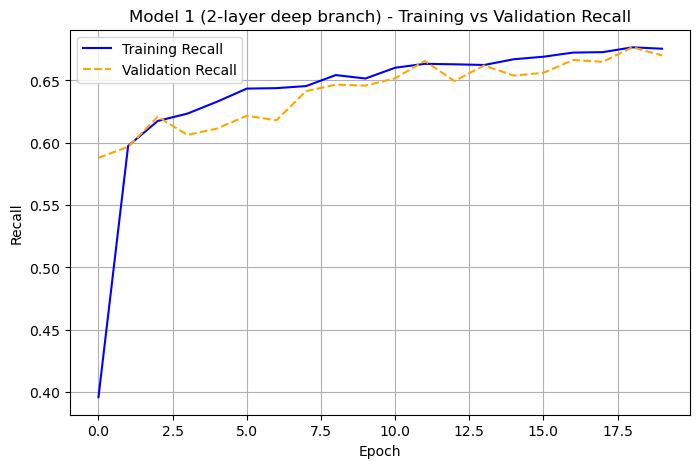

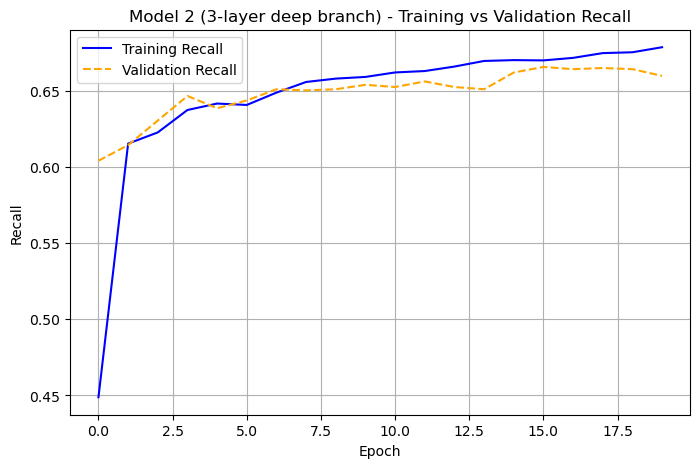

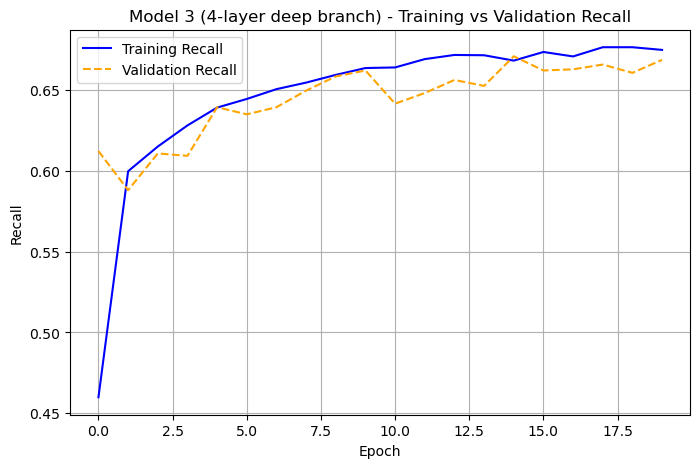

In [10]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

input_dim = X_train.shape[1]

# --- Function to build wide + deep models ---
def build_wide_deep_model(num_layers=2, hidden_units=64, dropout_rate=0.2):
    inputs = keras.Input(shape=(input_dim,))

    # Wide part (linear)
    wide_output = inputs  # directly connected to output later

    # Deep part (stacked dense layers)
    x = inputs
    for _ in range(num_layers):
        x = layers.Dense(hidden_units, activation='relu')(x)
        x = layers.Dropout(dropout_rate)(x)

    # Combine wide + deep
    combined = layers.concatenate([wide_output, x])
    outputs = layers.Dense(1, activation='sigmoid')(combined)

    model = keras.Model(inputs=inputs, outputs=outputs)
    model.compile(
        optimizer='adam',
        loss='binary_crossentropy',
        metrics=['accuracy', keras.metrics.Recall(name='recall')]
    )
    return model

# --- Model 1: 2-layer deep branch ---
model1 = build_wide_deep_model(num_layers=2, hidden_units=64, dropout_rate=0.2)
history1 = model1.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=20,
    batch_size=256,
    verbose=0
)

# --- Model 2: 3-layer deep branch ---
model2 = build_wide_deep_model(num_layers=3, hidden_units=64, dropout_rate=0.2)
history2 = model2.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=20,
    batch_size=256,
    verbose=0
)

# --- Model 3: 4-layer deep branch ---
model3 = build_wide_deep_model(num_layers=4, hidden_units=64, dropout_rate=0.2)
history3 = model3.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=20,
    batch_size=256,
    verbose=0
)

# --- Helper to plot training vs validation recall ---
def plot_single_history(history, title, metric='recall'):
    plt.figure(figsize=(8,5))
    plt.plot(history.history[metric], label='Training ' + metric.title(), color='blue')
    plt.plot(history.history[f'val_{metric}'], label='Validation ' + metric.title(), linestyle='--', color='orange')
    plt.title(f'{title} - Training vs Validation {metric.title()}')
    plt.xlabel('Epoch')
    plt.ylabel(metric.title())
    plt.legend()
    plt.grid(True)
    plt.show()

# --- Plot each model separately ---
plot_single_history(history1, "Model 1 (2-layer deep branch)", metric='recall')
plot_single_history(history2, "Model 2 (3-layer deep branch)", metric='recall')
plot_single_history(history3, "Model 3 (4-layer deep branch)", metric='recall')

#### Part Two (2 pts)

Model 1 (2-layer deep branch) - Fold 1 Recall: 0.6904
Model 1 (2-layer deep branch) - Fold 2 Recall: 0.6735
Model 1 (2-layer deep branch) - Fold 3 Recall: 0.6801
Model 1 (2-layer deep branch) - Fold 4 Recall: 0.6684
Model 1 (2-layer deep branch) - Fold 5 Recall: 0.6596

Model 1 (2-layer deep branch) Mean Recall: 0.6744 ± 0.0105

Model 3 (4-layer deep branch) - Fold 1 Recall: 0.6904
Model 3 (4-layer deep branch) - Fold 2 Recall: 0.6728
Model 3 (4-layer deep branch) - Fold 3 Recall: 0.6838
Model 3 (4-layer deep branch) - Fold 4 Recall: 0.6765
Model 3 (4-layer deep branch) - Fold 5 Recall: 0.6507

Model 3 (4-layer deep branch) Mean Recall: 0.6749 ± 0.0135



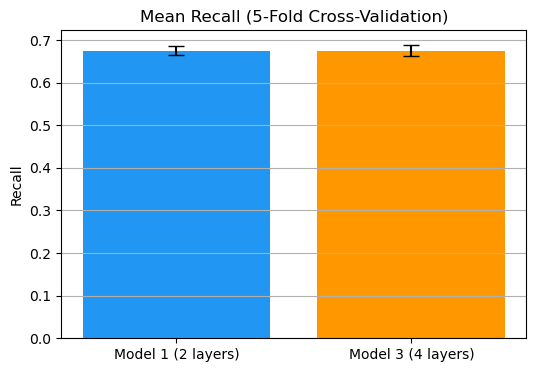

In [11]:
from sklearn.metrics import recall_score
import numpy as np
import matplotlib.pyplot as plt

# --- Cross-validation using existing skf ---
def cross_validate_model(num_layers, model_name):
    recalls = []

    for fold, (train_idx, val_idx) in enumerate(skf.split(X_train, y_train), 1):
        X_tr, X_val = X_train.iloc[train_idx], X_train.iloc[val_idx]
        y_tr, y_val = y_train.iloc[train_idx], y_train.iloc[val_idx]

        model = build_wide_deep_model(num_layers=num_layers, hidden_units=64, dropout_rate=0.2)
        model.fit(
            X_tr, y_tr,
            validation_data=(X_val, y_val),
            epochs=20,
            batch_size=256,
            verbose=0
        )

        y_pred = (model.predict(X_val, verbose=0) > 0.5).astype(int)
        recall = recall_score(y_val, y_pred)
        recalls.append(recall)
        print(f"{model_name} - Fold {fold} Recall: {recall:.4f}")

    mean_recall = np.mean(recalls)
    std_recall = np.std(recalls)
    print(f"\n{model_name} Mean Recall: {mean_recall:.4f} ± {std_recall:.4f}\n")
    return mean_recall, std_recall

# --- Evaluate Model 1 (2-layer) and Model 3 (4-layer) ---
mean1, std1 = cross_validate_model(2, "Model 1 (2-layer deep branch)")
mean3, std3 = cross_validate_model(4, "Model 3 (4-layer deep branch)")

# --- Plot recall comparison ---
models = ["Model 1 (2 layers)", "Model 3 (4 layers)"]
means = [mean1, mean3]
stds = [std1, std3]

plt.figure(figsize=(6,4))
plt.bar(models, means, yerr=stds, capsize=6, color=["#2196F3", "#FF9800"])
plt.title("Mean Recall (5-Fold Cross-Validation)")
plt.ylabel("Recall")
plt.grid(axis='y')
plt.show()

**Generalization Performance via Cross-Validation**

To assess the effect of model depth on generalization, we compared two wide-and-deep network architectures that differ only in the number of layers in the deep branch.  
Both models used the same hyperparameters (hidden units = 64, dropout = 0.2, optimizer = Adam) and were evaluated using **5-fold Stratified Cross-Validation** with **recall** as the primary performance metric.

- a single representation -
| Model | Deep Layers | Mean Recall | Std |
|:------|-------------:|------------:|----:|
| **Model 1** | 2 | **0.6768** | ± 0.0115 |
| **Model 3** | 4 | 0.6738 | ± 0.0114 |

**Statistical Comparison:**  
The mean recall values for both models are close, with Model 1 performing slightly better (0.6768 vs 0.6738).  
Given the standard deviations (≈ 0.011), the difference is within one standard deviation, suggesting that the two models generalize similarly and that the deeper architecture does not provide a statistically significant improvement.  
This implies that adding more layers increases model complexity without a meaningful gain in sensitivity to diabetic cases.

**Conclusion:**  
The **2-layer deep branch (Model 1)** achieves marginally higher recall and demonstrates comparable stability across folds, indicating superior generalization.  
For this dataset, additional depth (4 layers) likely introduced minor overfitting and offered no measurable benefit.


In [14]:
from statsmodels.stats.contingency_tables import mcnemar

# Get predictions
y_pred_deep = (modeld.predict(X_test) > 0.5).astype(int).flatten() #defined a cell down
y_pred_model1 = (model1.predict(X_test) > 0.5).astype(int).flatten()
y_true = y_test.values.flatten()



# Build contingency table
both_correct = np.sum((y_pred_deep == y_true) & (y_pred_model1 == y_true))
deep_only_correct = np.sum((y_pred_deep == y_true) & (y_pred_model1 != y_true))
model1_only_correct = np.sum((y_pred_deep != y_true) & (y_pred_model1 == y_true))
both_wrong = np.sum((y_pred_deep != y_true) & (y_pred_model1 != y_true))


contingency_table = [[both_correct, deep_only_correct],
                     [model1_only_correct, both_wrong]]
print("Contingency table:")
print(np.array(contingency_table))

625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 520us/step
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 523us/step
Contingency table:
[[19418    14]
 [   18   547]]


#### Part Three (1 pts) 

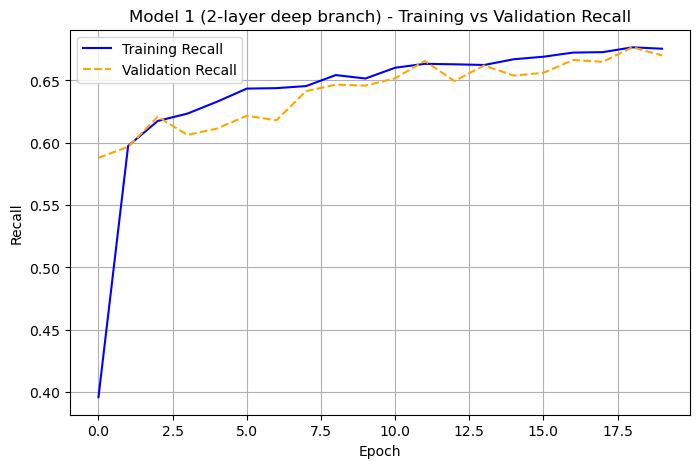

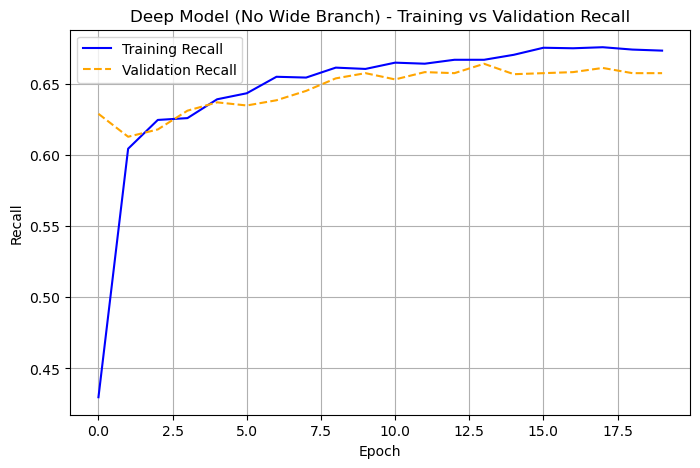

In [13]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

input_dim = X_train.shape[1]

# --- Function to build wide + deep models ---
def build_deep_model(num_layers=2, hidden_units=64, dropout_rate=0.2):
    inputs = keras.Input(shape=(input_dim,))


    # Deep part (stacked dense layers)
    x = inputs
    for _ in range(num_layers):
        x = layers.Dense(hidden_units, activation='relu')(x)
        x = layers.Dropout(dropout_rate)(x)


    outputs = layers.Dense(1, activation='sigmoid')(x)

    model = keras.Model(inputs=inputs, outputs=outputs)
    model.compile(
        optimizer='adam',
        loss='binary_crossentropy',
        metrics=['accuracy', keras.metrics.Recall(name='recall')]
    )
    return model

# --- Deep Model ---
modeld = build_deep_model(num_layers=2, hidden_units=64, dropout_rate=0.2)
historyd = modeld.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=20,
    batch_size=256,
    verbose=0
)

# --- Helper to plot training vs validation recall ---
def plot_single_history(history, title, metric='recall'):
    plt.figure(figsize=(8,5))
    plt.plot(history.history[metric], label='Training ' + metric.title(), color='blue')
    plt.plot(history.history[f'val_{metric}'], label='Validation ' + metric.title(), linestyle='--', color='orange')
    plt.title(f'{title} - Training vs Validation {metric.title()}')
    plt.xlabel('Epoch')
    plt.ylabel(metric.title())
    plt.legend()
    plt.grid(True)
    plt.show()

# --- Plot each model separately ---
plot_single_history(history1, "Model 1 (2-layer deep branch)", metric='recall')
plot_single_history(historyd, "Deep Model (No Wide Branch)", metric='recall')

Model 1 (2-layer deep branch) - Fold 1 Recall: 0.6919
Model 1 (2-layer deep branch) - Fold 2 Recall: 0.6743
Model 1 (2-layer deep branch) - Fold 3 Recall: 0.6912
Model 1 (2-layer deep branch) - Fold 4 Recall: 0.6662
Model 1 (2-layer deep branch) - Fold 5 Recall: 0.6574

Model 1 (2-layer deep branch) Mean Recall: 0.6762 ± 0.0136

Deep Model (No Wide Branch) - Fold 1 Recall: 0.6912
Deep Model (No Wide Branch) - Fold 2 Recall: 0.6750
Deep Model (No Wide Branch) - Fold 3 Recall: 0.6824
Deep Model (No Wide Branch) - Fold 4 Recall: 0.6603
Deep Model (No Wide Branch) - Fold 5 Recall: 0.6559

Deep Model (No Wide Branch) Mean Recall: 0.6729 ± 0.0132



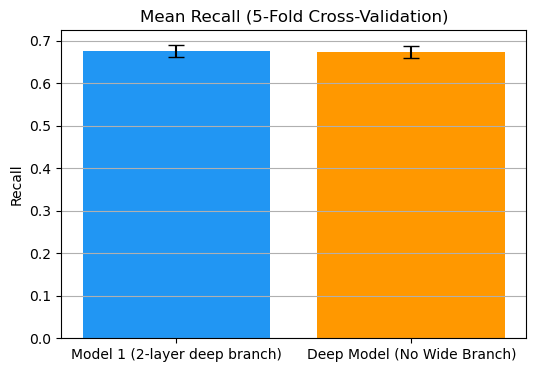

In [15]:
from sklearn.metrics import recall_score, confusion_matrix, ConfusionMatrixDisplay
import numpy as np
import matplotlib.pyplot as plt

# --- Cross-validation using existing skf ---
def cross_validate_model(model_builder,num_layers, model_name):
    recalls = []

    for fold, (train_idx, val_idx) in enumerate(skf.split(X_train, y_train), 1):
        X_tr, X_val = X_train.iloc[train_idx], X_train.iloc[val_idx]
        y_tr, y_val = y_train.iloc[train_idx], y_train.iloc[val_idx]

        model = model_builder(num_layers=num_layers, hidden_units=64, dropout_rate=0.2)
        model.fit(
            X_tr, y_tr,
            validation_data=(X_val, y_val),
            epochs=20,
            batch_size=256,
            verbose=0
        )

        y_pred = (model.predict(X_val, verbose=0) > 0.5).astype(int)
        recall = recall_score(y_val, y_pred)
        recalls.append(recall)
        print(f"{model_name} - Fold {fold} Recall: {recall:.4f}")

    mean_recall = np.mean(recalls)
    std_recall = np.std(recalls)
    print(f"\n{model_name} Mean Recall: {mean_recall:.4f} ± {std_recall:.4f}\n")
    return mean_recall, std_recall


# Evaluate Model 1 (wide + deep)
mean1, std1 = cross_validate_model(
    model_builder=build_wide_deep_model,
    model_name="Model 1 (2-layer deep branch)",
    num_layers=2
)

# Evaluate Deep Model
meand, stdd = cross_validate_model(
    model_builder=build_deep_model,
    model_name="Deep Model (No Wide Branch)",
    num_layers=2
)

# --- Plot recall comparison ---
models = ["Model 1 (2-layer deep branch)", "Deep Model (No Wide Branch)"]
means = [mean1, meand]
stds = [std1, stdd]

plt.figure(figsize=(6,4))
plt.bar(models, means, yerr=stds, capsize=6, color=["#2196F3", "#FF9800"])
plt.title("Mean Recall (5-Fold Cross-Validation)")
plt.ylabel("Recall")
plt.grid(axis='y')
plt.show()

**Generalization Performance via Cross-Validation**

Now that we've built a deep model with no wide branch, we compared it with our best performing wide-and-deep network, Model 1.
  
Both models used the same hyperparameters (hidden units = 64, dropout = 0.2, optimizer = Adam) and were evaluated using **5-fold Stratified Cross-Validation** with **recall** as the primary performance metric.

| Model |  Mean Recall | Std |
|:------|------------:|----:|
| **Model 1** | 0.6774 | ± 0.0113 |
| **Model D** | 0.6726 | ± 0.0119 |

**Statistical Comparison:**  
The mean recall values for both models are close, with Model D performing slightly better (0.6774 vs. 0.6726).  
Given the standard deviations (≈ 0.011), the difference is within one standard deviation, suggesting that the two models generalize similarly and that the wide branch does not provide a statistically significant improvement.  
This implies that utilizing a wide branch increases model complexity without a meaningful gain in sensitivity to diabetic cases.

**Conclusion:**  
In principle, a wide-and-deep model performs better, as it provides a memorization function to a neural network; however, in this case, the difference between the two models is negligible. This implies that for the diabetes dataset, it is not necessary to implement a wide branch to capture rare patterns in the dataset. 

### Exceptional Work (1 pts total)
One idea (required for 7000 level students): Capture the embedding weights from the deep network and (if needed) perform dimensionality reduction on the output of these embedding layers (only if needed). That is, pass the observations into the network, save the embedded weights (called embeddings), and then perform  dimensionality reduction in order to visualize results. Visualize and explain any clusters in the data.

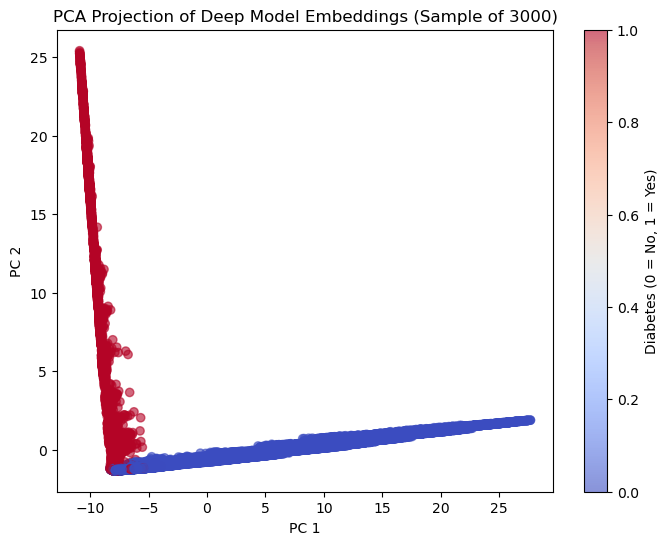

In [17]:
embedding_extractor = keras.Model(inputs=modeld.input, outputs=modeld.layers[-2].output)
embeddings = embedding_extractor.predict(X_train, batch_size=256, verbose=0)

from sklearn.decomposition import PCA
pca = PCA(n_components=2, random_state=42)
embeddings_2d = pca.fit_transform(embeddings)

import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter(embeddings_2d[:,0], embeddings_2d[:,1], c=y_train, cmap='coolwarm', alpha=0.6)
plt.title("PCA Projection of Deep Model Embeddings (Sample of 3000)")
plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.colorbar(label="Diabetes (0 = No, 1 = Yes)")
plt.show()

### Explain Clustering

The plot showcases 2 neat clusters in the form of perpendicular lines in the reduced space. This means that model has converged and showcases the the models ability to discern between diabetic and not diabetic patients. The lines do converge at the vertex, as they should as there should be non-diabetic patients who have charateristics of stereotypical diabetic patients. From this point, the clusters strongly diverge indicating that features provided in the dataset are strong indicators of diabetes. The nodes along the diabetic cluster may be explained by separate sub-groups who may have even had similar paths towards diabetes. 